## <center>  <b> NLP Navigator - Assignment 1 </b>  </center>

This is the first assignment of the project and will test your basic python skills and what you have learnt so far about the libraries like numpy and matplotlib. The problem statement and your tasks are described below. You have to rename the notebook as `{Your Name}_Assignment1.ipynb` and write all the code and then generate outputs in it. Submission will be on github and more guidelines will be given soon. The deadline to submit the assignment is `10th June 5:00 PM`

Given a set of $ n $ points in $ d $ dimensional Euclidean Space, we will find all pairs of points whose Euclidean distance is less than $ r $.

Let  $ \overrightarrow{P_1} = (P_{11},P_{12}, \ldots, P_{1d}) $ and $ \overrightarrow{P_2} = (P_{21},P_{22}, \ldots, P_{2d}) $ be two points. Then the Euclidean distance between them is equal to the norm $ \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| $.

We have to find the set $ A = \left\{(i, j): \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| \leq r \right\} $ where $ i,j \in \{1,2,3,...,n\} $.


Obviously we can find it by using 2 nested loops and searching over all pairs, but we will do the task in an optimised way. Let us make a grid where each cell is of dimension $ r \times r $. Then, (say d = 2)

![graph1](https://drive.google.com/uc?export=view&id=1qIcPgkv9Q3fI-eV5AaAobjFIYy_2siZN)

Divide the points into the cells based on their coordinates. For example, say $ 4 $ points $ \left( \frac{1}{2}, \frac{2}{3} \right), \left( \frac{2}{3}, \frac{3}{2} \right), \left( 1, 1 \right), \left( \frac{3}{2}, \frac{5}{2} \right) $ and $ r = 1 $. So the division should be like -

![graph2](https://drive.google.com/uc?export=view&id=1-u-mT1PTxOkow_uz0T8ZBjU35u63uU7F)

Now comes the observation: For any point, the points which are within distance $ d $ from it must lie in 8 adjacent cells and no where else. So, for every point, just search the points present in 8 adjacent cells, and add the valid pairs to the answer set $ A $. Please note that for corner cells, the number of adjacent cells will not be equal to 8. So, write your code including those cases also.
##### Some points for higher dimension cases:
1. Think whether the number of adjacent cells for higher dimensions will be 8 or more (or less).
2. Observe that the dimension of each cell will not be $r*r$ for each case.
##### <u>Note</u>: Assume the pair $ (i,j) $ and $ (j,i) $ to be same. So write your code accordingly. For example, in 2-D space, we will count $ ((1,2), (4,5)) $ and $ ((4,5), (1,2)) $ only once.

## Tasks TO DO:

1. Generate a set of $ 1000 $ random points in $ 2 $ dimensional space with coordinates ranging between 0 and 100.
2. For $ r = \{ 1, 2, \ldots, 10 \} $, divide the points into grid as shown.
   - Show using matplotlib the various points using different colours.
   - Find pairs and store them in a list/set $ A $
3. Do task 1 and 2 for $ d = 3, 4, 10, 50, 100 $ (except plotting) and store the results.
(You can also plot for $ d = 3 $ but it is optional)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
a = np.random.uniform(100,size=(1000,2))
a
a = a.round(2)

**the value of r can be changed from below**



In [15]:
df = pd.DataFrame(a)
r=5
df

,0,1
0,57.96,46.86
1,23.90,86.14
2,68.00,27.20
3,67.80,49.05
4,23.38,19.27
...,...,...
995,80.34,30.82
996,5.11,75.55
997,24.01,56.80
998,69.76,99.86


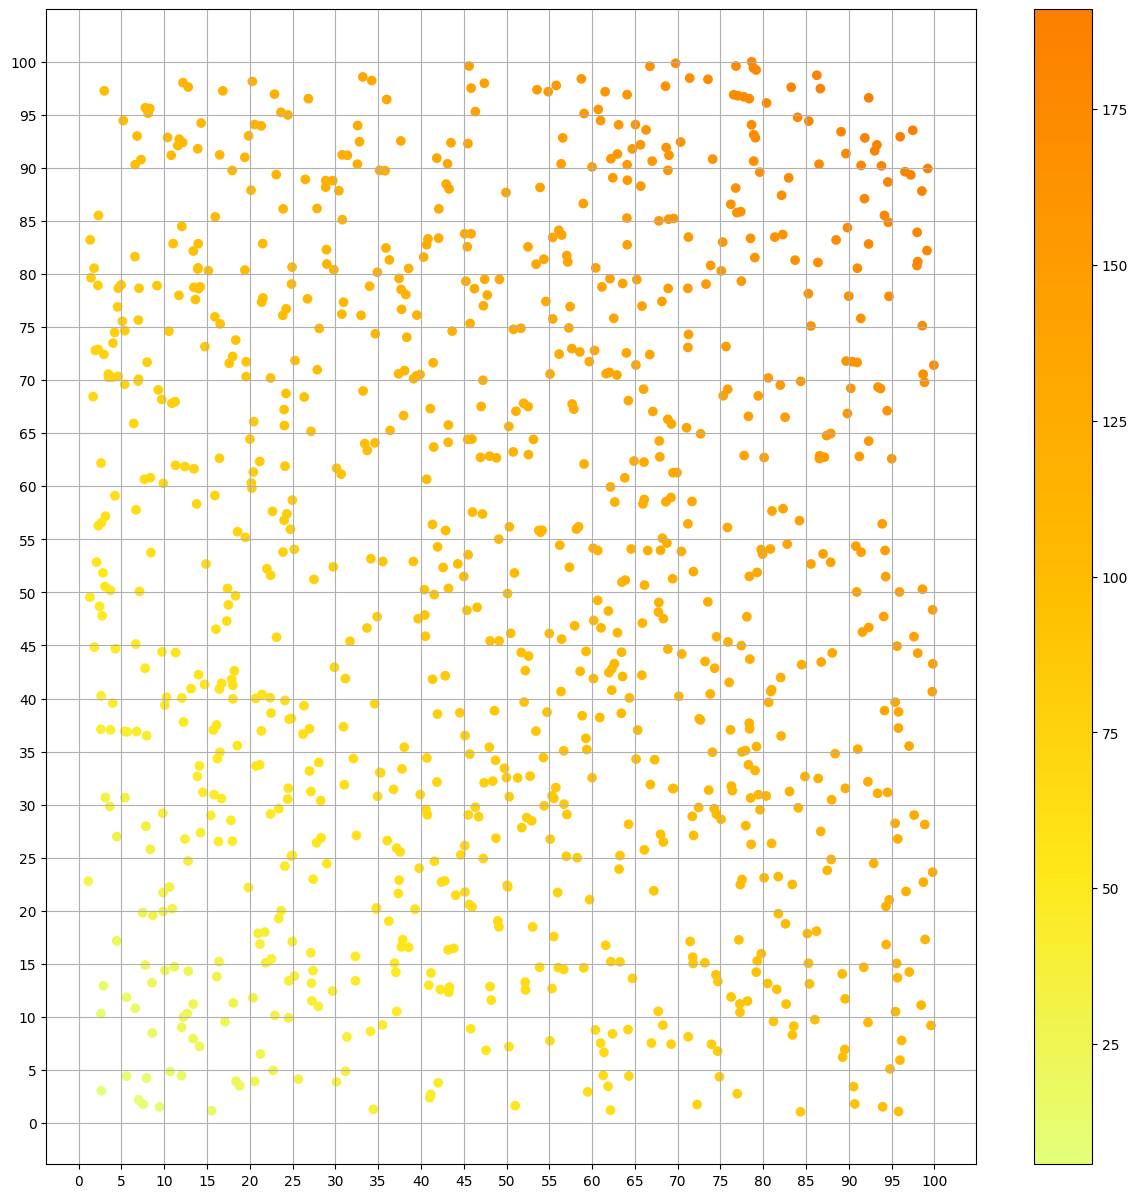

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df.iloc[:,0]+df.iloc[:,1],cmap='Wistia')
plt.xticks(np.arange(0,101,r))
plt.yticks(np.arange(0,101,r))

plt.colorbar()

plt.grid()

In [17]:
def grid(x,y,r):
  dfnew=  df[(df.iloc[:,0]>=x*r)&(df.iloc[:,0]<(x+1)*r)&(df.iloc[:,1]>=y*r)&(df.iloc[:,1]<(y+1)*r)]

  return dfnew.reset_index(drop = True)

In [18]:
answer = pd.DataFrame([[9.0,9.0,9.0,9.0]])

In [19]:
answer


,0,1,2,3
0,9.0,9.0,9.0,9.0


In [20]:
def dist(ax,ay,bx,by):
  return (ax-bx)**2+(ay-by)**2
for i in range(int(100/r)):
  print(i)
  for j in range(int(100/r)):
    df1 = grid(i,j,r)
    df2 = grid(i+1,j,r)
    df3 = grid(i+1,j+1,r)
    df4 = grid(i,j+1,r)
    df5 = grid(i-1,j+1,r)
    for index1 in df1.index:
      for index2 in df1.index:
        if(index1<index2):
          if(dist(df1.iloc[index1,0],df1.iloc[index1,1],df1.iloc[index2,0],df1.iloc[index2,1])<=r**2):
            temp = pd.DataFrame([[df1.iloc[index1,0],df1.iloc[index1,1],df1.iloc[index2,0],df1.iloc[index2,1]]])
            answer= pd.concat([answer,temp],ignore_index=True)
      for index2 in df2.index:
        if(dist(df1.iloc[index1,0],df1.iloc[index1,1],df2.iloc[index2,0],df2.iloc[index2,1])<=r**2):
          temp = pd.DataFrame([[df1.iloc[index1,0],df1.iloc[index1,1],df2.iloc[index2,0],df2.iloc[index2,1]]])
          answer= pd.concat([answer,temp],ignore_index=True)

      for index2 in df3.index:
        if(dist(df1.iloc[index1,0],df1.iloc[index1,1],df3.iloc[index2,0],df3.iloc[index2,1])<=r**2):
          temp = pd.DataFrame([[df1.iloc[index1,0],df1.iloc[index1,1],df3.iloc[index2,0],df3.iloc[index2,1]]])
          answer= pd.concat([answer,temp],ignore_index=True)

      for index2 in df4.index:
        if(dist(df1.iloc[index1,0],df1.iloc[index1,1],df4.iloc[index2,0],df4.iloc[index2,1])<=r**2):
          temp = pd.DataFrame([[df1.iloc[index1,0],df1.iloc[index1,1],df4.iloc[index2,0],df4.iloc[index2,1]]])
          answer= pd.concat([answer,temp],ignore_index=True)

      for index2 in df5.index:
        if(dist(df1.iloc[index1,0],df1.iloc[index1,1],df5.iloc[index2,0],df5.iloc[index2,1])<=r**2):
          temp = pd.DataFrame([[df1.iloc[index1,0],df1.iloc[index1,1],df5.iloc[index2,0],df5.iloc[index2,1]]])
          answer= pd.concat([answer,temp],ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [21]:
answer

,0,1,2,3
0,9.00,9.00,9.00,9.00
1,2.65,3.05,7.00,2.18
2,2.65,3.05,5.59,4.42
3,2.60,10.32,2.90,12.93
4,2.60,10.32,5.59,11.85
...,...,...,...,...
4021,96.56,89.64,96.00,92.94
4022,96.56,89.64,93.02,91.61
4023,96.56,89.64,93.81,90.19
4024,96.56,89.64,93.28,92.17
